<a href="https://colab.research.google.com/github/nishapedsangi2000/Sparks-Foundation-Intern/blob/main/Task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Prediction Using Supervised ML</h2>
<h4>Predict the percentage of an student based on the no of study hours
</h4>
<h6>Author: Nisha Pedsangi</h6>

In [3]:
#import the required packages and the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.linear_model import LinearRegression
data=pd.read_csv("/content/drive/MyDrive/Sparks_Intern/Student_Score.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#display the basic statistical details of the DataFrame
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Print a concise summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There is no null values in the DataFrame. 
So we don't have to perform data cleaning we can vizualize the data


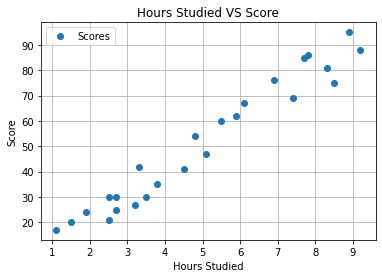

In [6]:
#Plot a graph for Hours of Studied against Score using Matplotlid 
data.plot(x="Hours",y="Scores",style='o')
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Hours Studied VS Score")
plt.grid()

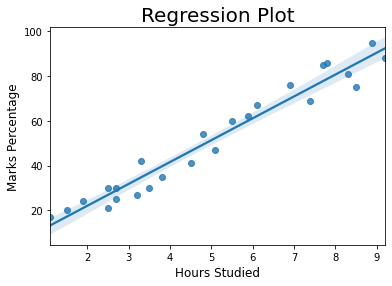

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

Split the data , Design the data & Fit the data

In [8]:
#Split the data
#Defining X and Y from the data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0) 

# fitting the data
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the Marks 


In [9]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Compare the Actual Marks & Prdicted Marks

In [11]:
compare = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Plot the graph Accordingly

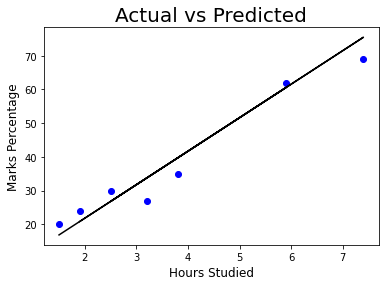

In [10]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [12]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


Mean Absolute error is very low which leads to higher accuracy

In [13]:
hours = [8]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 81.466


According to the regression model if a student studies for 8 hours day he/she is likely to score 81.46 marks.